# House Price Prediction

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')


# Reading Input data for House price prediction

In [2]:

df=pd.read_csv("C:\\Users\\narsi\\Downloads\\Housing Price data set.csv")

In [3]:
df

,Unnamed: 0,price,plotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [4]:
print(df.shape)

(546, 13)


In [5]:
print(df.head())

   Unnamed: 0    price  plotsize  bedrooms  bathrms  stories driveway recroom  \
0           1  42000.0      5850         3        1        2      yes      no   
1           2  38500.0      4000         2        1        1      yes      no   
2           3  49500.0      3060         3        1        1      yes      no   
3           4  60500.0      6650         3        1        2      yes     yes   
4           5  61000.0      6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'price', 'plotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')


# Describing data

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   plotsize    546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB
None


In [8]:
print(df.describe())

       Unnamed: 0          price      plotsize    bedrooms     bathrms  \
count  546.000000     546.000000    546.000000  546.000000  546.000000   
mean   273.500000   68121.597070   5150.265568    2.965201    1.285714   
std    157.760895   26702.670926   2168.158725    0.737388    0.502158   
min      1.000000   25000.000000   1650.000000    1.000000    1.000000   
25%    137.250000   49125.000000   3600.000000    2.000000    1.000000   
50%    273.500000   62000.000000   4600.000000    3.000000    1.000000   
75%    409.750000   82000.000000   6360.000000    3.000000    2.000000   
max    546.000000  190000.000000  16200.000000    6.000000    4.000000   

          stories    garagepl  
count  546.000000  546.000000  
mean     1.807692    0.692308  
std      0.868203    0.861307  
min      1.000000    0.000000  
25%      1.000000    0.000000  
50%      2.000000    0.000000  
75%      2.000000    1.000000  
max      4.000000    3.000000  


# Checking Null values and Data Preprocessing

In [9]:
print(df.isnull().sum())

Unnamed: 0    0
price         0
plotsize      0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64


In [10]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))




Categorical variables: 6
Integer variables: 0
Float variables: 1


# Exploratory Data Analysis

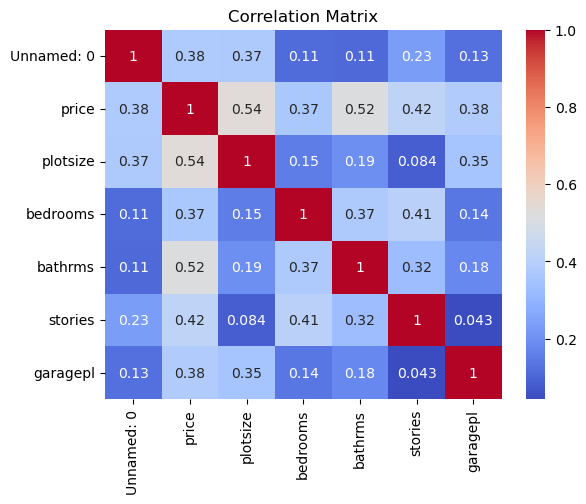

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



<Axes: title={'center': 'No. Unique values of Categorical Features'}>

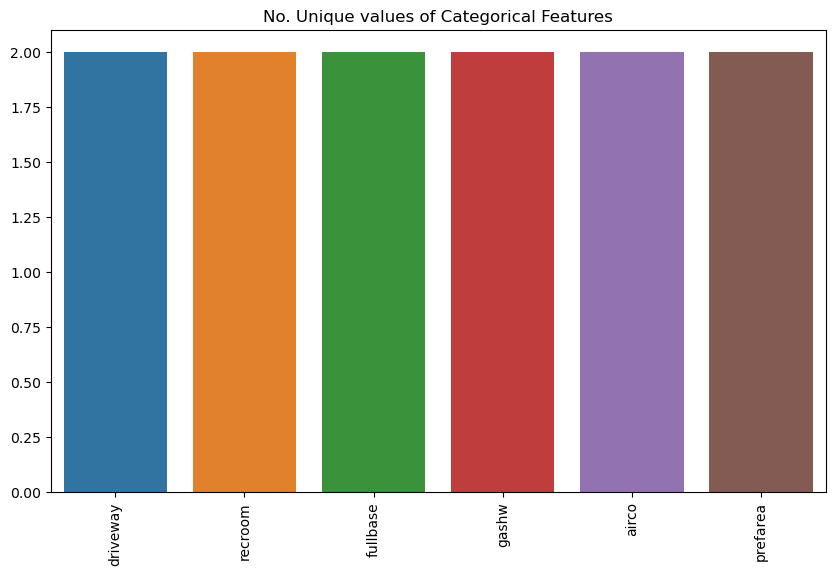

In [12]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


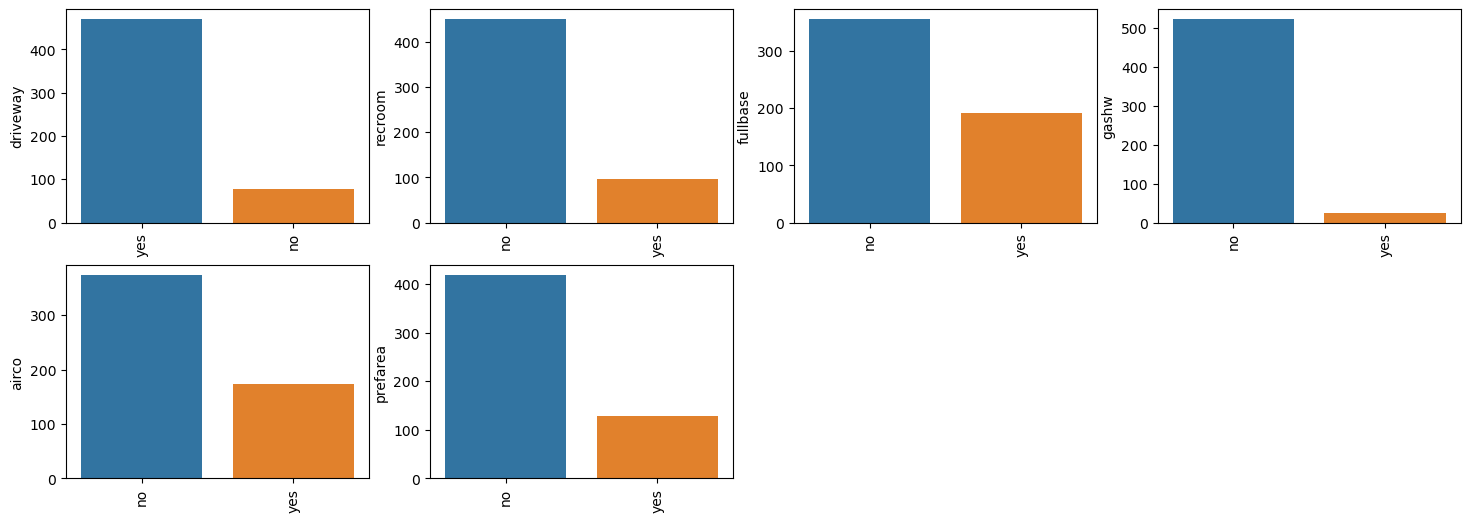

In [13]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


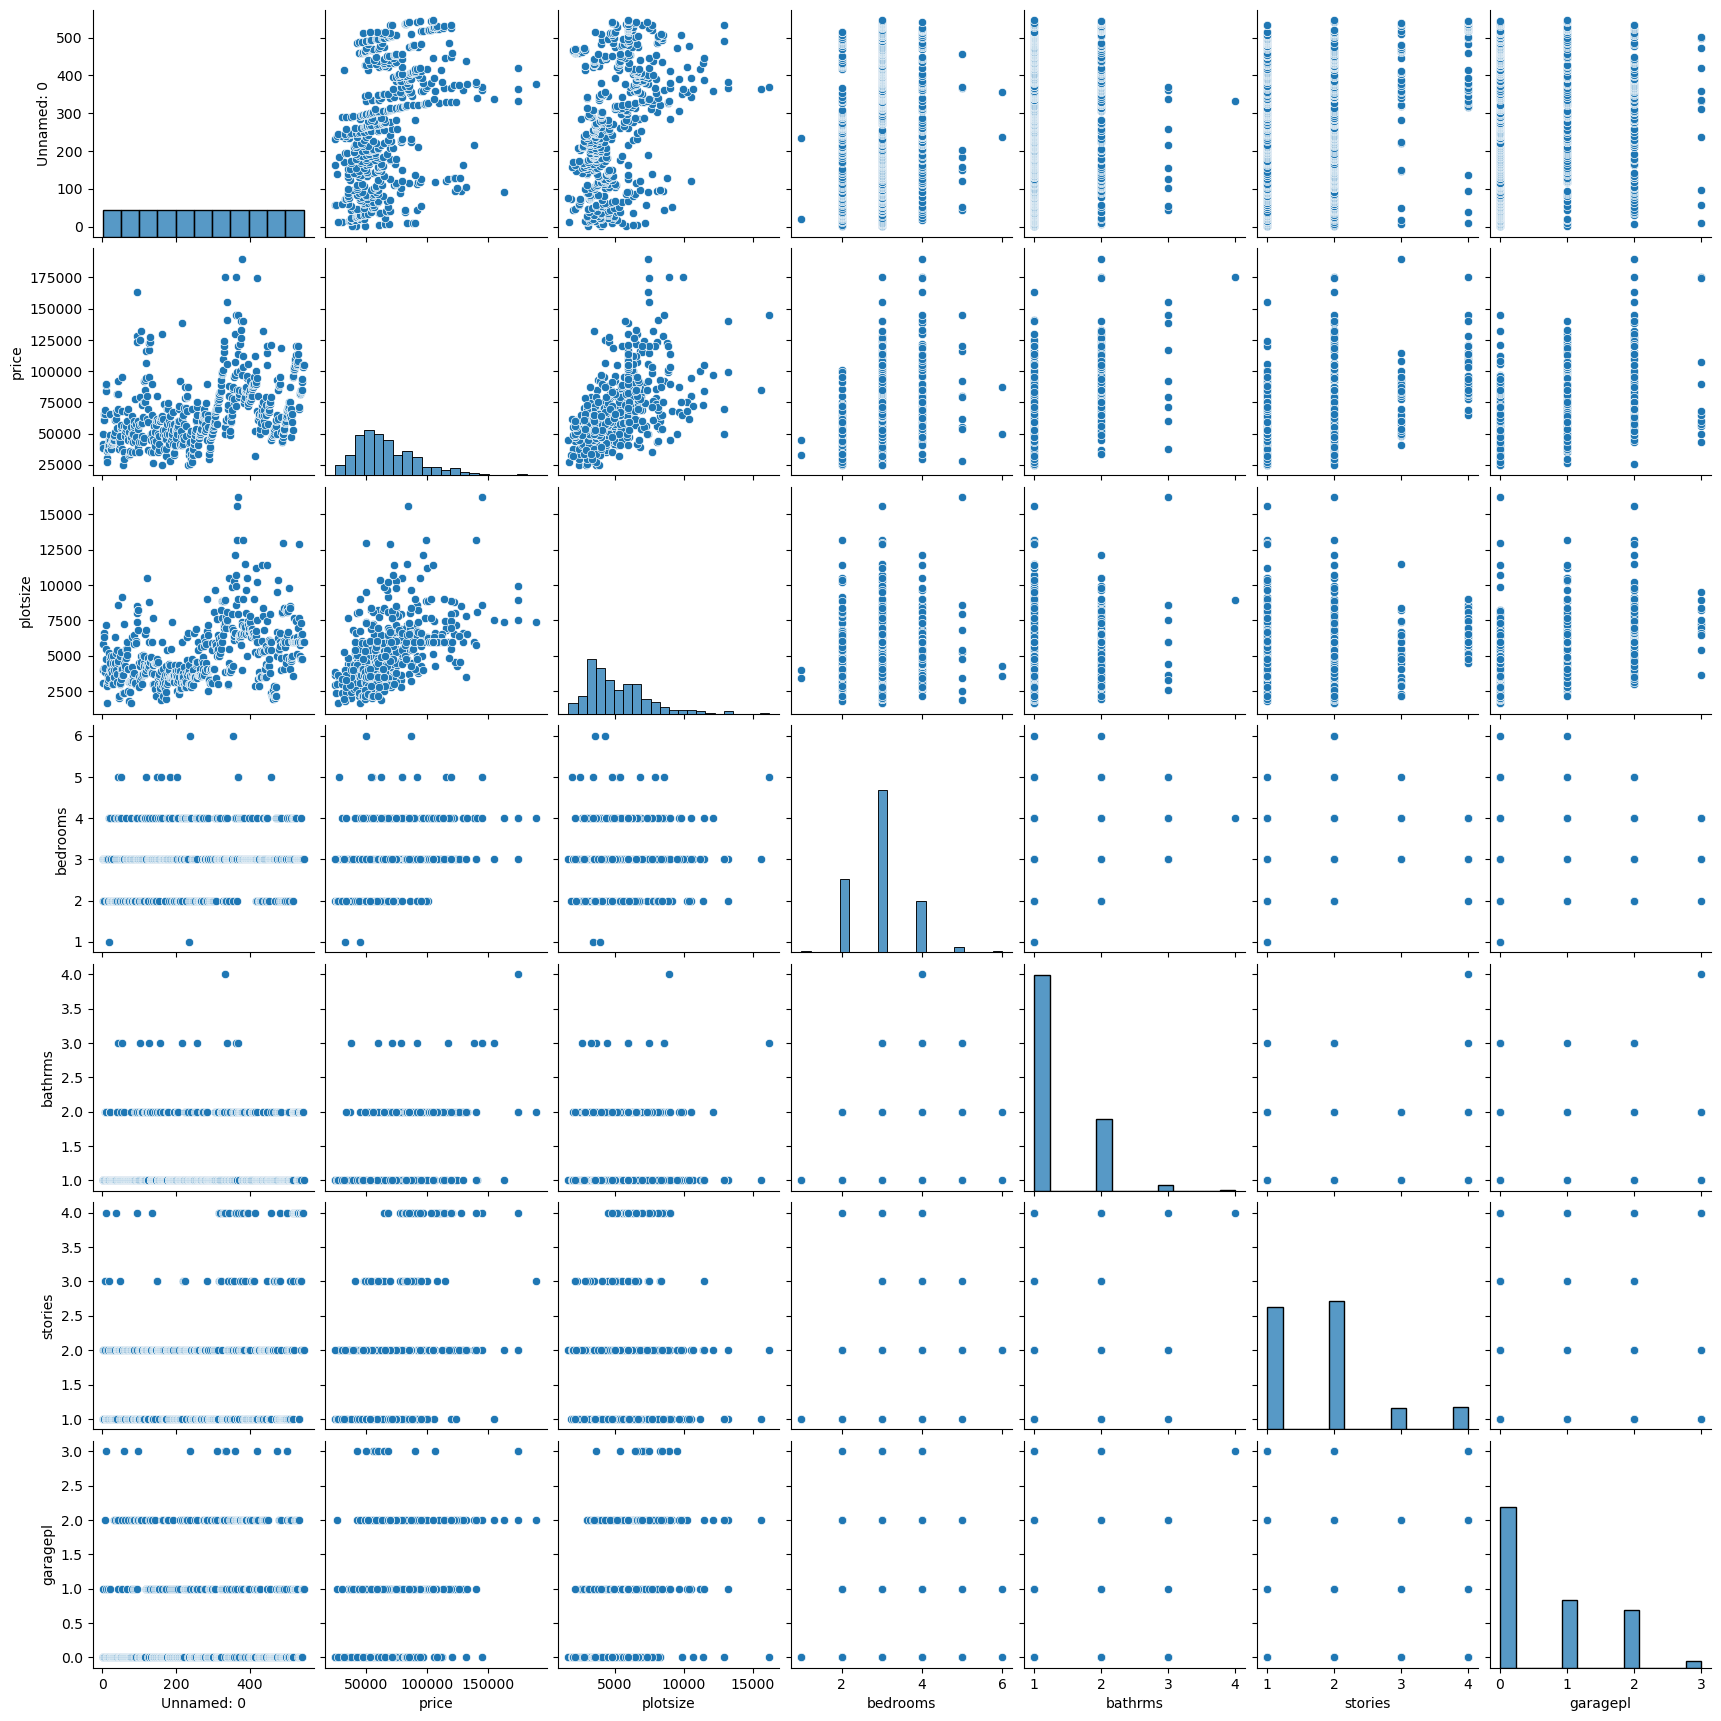

In [14]:
sns.pairplot(df)

# splitting and Building the Linear Regression Model

In [15]:
x=df[['plotsize','bedrooms','bathrms','stories','garagepl']]
y=df['price']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [17]:
x_train.head()

,plotsize,bedrooms,bathrms,stories,garagepl
462,2610,3,1,2,0
252,6930,4,1,2,1
217,3150,3,1,2,0
22,4000,3,1,2,0
41,4520,3,1,2,0


In [18]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

# Model Evaluation

In [19]:
# Model Evaluation
y_pred = model.predict(x_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 302804397.4247699
R-squared: 0.44791628538633754


# Predictions and Visualization


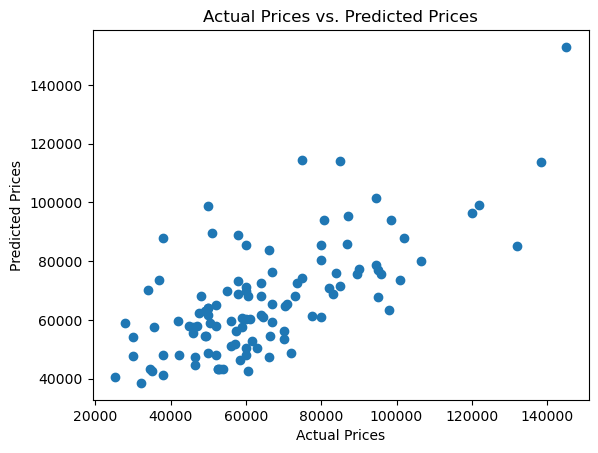

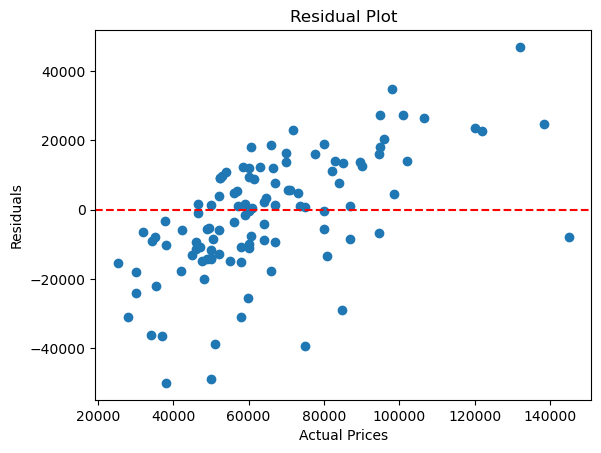

Predicted Price: 36150.01172036478


In [20]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[3, 2, 1, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])